# Purpose 
To load in and analysise some world crime data from the UNDOC.

In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
import datetime
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# Setting out standard formatts for any Graphs below 

In [2]:
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=20, figsize=(15, 7.5))

In [3]:
# Ensure the file exists
if not os.path.exists( r"..\..\data\raw\UNODC\homicide_report_total_and_sex.xlsx" ):
    print("Missing dataset file")

In [4]:
# Getting the individual sheets fromm each xlsx
xls1 = pd.ExcelFile( r"..\..\data\raw\UNODC\homicide_report_total_and_sex.xlsx" )
df = pd.read_excel(xls1, 'Total Count and Rate')

In [5]:
df.rename(columns={'UNODC Name':'UNODC_Name'}, inplace=True)

In [6]:
df.head(2)

,Region,Subregion,UNODC_Name,Source,2000,2001,2002,2003,2004,2005,...,2007.1,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1
0,Africa,Eastern Africa,Burundi,CTS/SDG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.152326,4.429245,3.958056,3.859122,5.364974,5.416562,5.701698,4.519931,6.020522
1,Africa,Eastern Africa,Comoros,WHO Estimate,56.203224,NaN,NaN,NaN,NaN,58.332588,...,NaN,NaN,NaN,8.529913,NaN,NaN,NaN,NaN,7.703230,NaN


In [7]:
# Crime dataset containing the numbers of homicide by country 
df1 = df.iloc[:,0:21]

In [8]:
# Crime datset per 100,000 population
df2 = df.iloc[:,22:40]

In [9]:
# Isolating the first 4 coolumns so they can be added to the per 100,000 pop dataset
Region = df[df.columns[0]]
Subregion = df[df.columns[1]]
UNODC_Name = df[df.columns[2]]
Source = df[df.columns[3]]

In [10]:
# Turning the 4 columns to series so they can be added to the per 100k dataset
df2 = df2.assign(Region=Region.values)
df2 = df2.assign(Subregion=Subregion.values)
df2 = df2.assign(UNODC_Name=UNODC_Name.values)
df2 = df2.assign(Source=Source.values)

In [11]:
perHcapdf = df2
homdf = df1

In [12]:
# Removing irrelevant rows 
homdf = homdf[:-7]
perHcapdf = perHcapdf[:-7]

Changing the name and order of the homicide dataset per 100k people 

In [13]:
perHcapdf.columns = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013
                   , 2014, 2015, 2016, 'Region', 'Subregion', 'UNODC_Name', 'Source']

In [14]:
perHcapdf = perHcapdf[['Region', 'Subregion', 'UNODC_Name', 'Source', 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013
                   , 2014, 2015, 2016]]

# Homicide Rates Overall 2000-2016

In [17]:
perHcapdf.mean()

2000    8.233995
2001    8.044094
2002    8.634548
2003    7.927020
2004    8.031967
2005    7.917391
2006    7.779217
2007    7.744555
2008    7.981760
2009    8.030265
2010    8.062424
2011    7.962590
2012    7.941796
2013    6.831329
2014    7.264843
2015    7.210479
2016    8.202577
dtype: float64

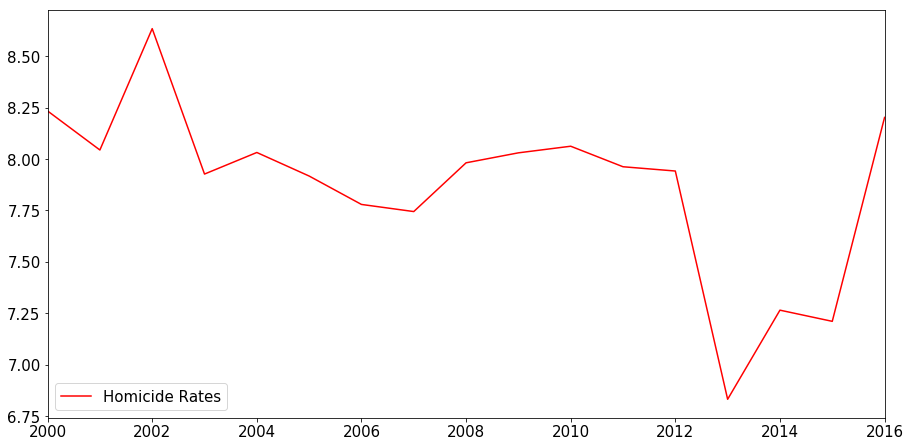

In [20]:
perHcapdf.mean().plot.line(color='Red')
plt.legend(labels=('Homicide Rates',), loc=3)

# Homicide Rates by Region 2000-2016 

In [21]:
# Grouping the avergae homicides of all the years by the regions 
homRegion = perHcapdf.groupby(['Region'])[list(perHcapdf.columns[4:21])].mean().reset_index()

In [22]:
homRegion

,Region,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Africa,10.627707,11.841040,10.375233,7.400477,8.019065,8.213009,6.063692,7.639838,7.327988,7.615734,8.219516,7.494797,7.358396,9.711858,8.131428,8.346643,12.952421
1,Americas,16.309500,16.207266,18.350022,18.042211,18.861285,17.945605,18.620938,18.425593,19.610433,21.046427,22.460960,22.070398,22.061646,17.779742,18.663815,19.469482,20.868185
2,Asia,3.961144,3.426251,3.329916,3.467868,3.364346,3.463740,3.274342,2.917755,3.690666,3.288676,3.454404,3.081824,3.088528,2.950052,2.666413,2.642189,2.297839
3,Europe,3.564155,3.578493,3.627710,3.284720,3.047056,2.834099,2.544873,2.329225,2.396898,2.037250,1.851453,1.710574,1.742950,1.645496,1.836985,1.500713,1.456294
4,Oceania,3.041099,3.447213,3.772303,3.149487,3.028122,3.666872,4.142594,2.636717,3.001122,3.076665,4.088072,4.708504,3.781846,2.561192,2.422483,3.749397,3.169128


In [23]:
# In order to plot a proper line graph we must first get the transpose of the df 
homRegionT = homRegion.set_index('Region').T
homRegionT

Region,Africa,Americas,Asia,Europe,Oceania
2000,10.627707,16.309500,3.961144,3.564155,3.041099
2001,11.841040,16.207266,3.426251,3.578493,3.447213
2002,10.375233,18.350022,3.329916,3.627710,3.772303
2003,7.400477,18.042211,3.467868,3.284720,3.149487
2004,8.019065,18.861285,3.364346,3.047056,3.028122
2005,8.213009,17.945605,3.463740,2.834099,3.666872
2006,6.063692,18.620938,3.274342,2.544873,4.142594
2007,7.639838,18.425593,2.917755,2.329225,2.636717
2008,7.327988,19.610433,3.690666,2.396898,3.001122
2009,7.615734,21.046427,3.288676,2.037250,3.076665


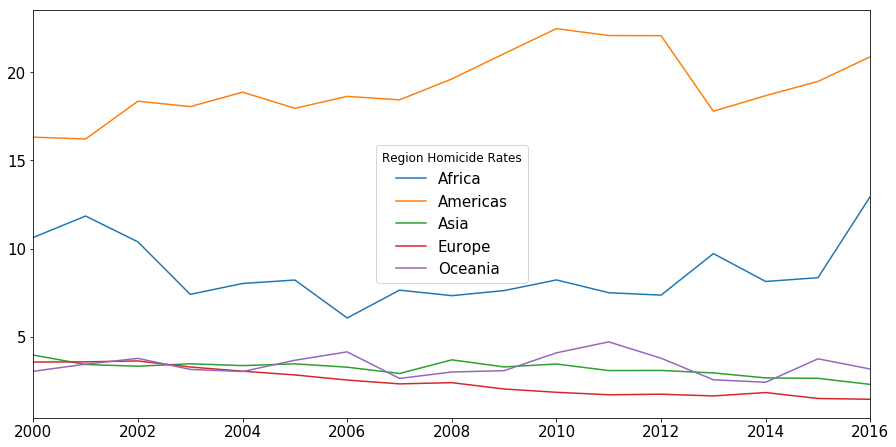

In [32]:
homRegionT.plot.line()
plt.legend(loc=10, title='Region Homicide Rates')